In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import os
import shutil
import random
from PIL import Image

In [2]:
root_path = r'D:\folder kiki\kuliah semester 5\praktikum KB\pa'
source_path = os.path.join(root_path, 'dataset_padang_food')
destination = os.path.join(root_path, 'data_tvt')
use_path = os.path.join(root_path, 'padang_food_clean')

In [3]:
#Data Preprocessing

In [4]:
folders = {}

for folder in os.listdir(use_path):
    folders[folder] = os.listdir(os.path.join(use_path, folder))
    

In [5]:
# make folder
if (os.path.isdir(os.path.join(root_path, 'padang_food_clean'))):
    print(f"path {os.path.join(root_path, 'padang_food_clean')} sudah ada")
else:
    os.makedirs(os.path.join(root_path, 'padang_food_clean'))
    for folder in folders.keys():
        os.makedirs(os.path.join(root_path, f'padang_food_clean/{folder}'))
        
# #resize image
for folder in os.listdir(source_path):
    for files in os.listdir(os.path.join(source_path, folder)):
        img1 = Image.open(os.path.join(source_path,f"{folder}/{files}"))
        img2 = img1.convert('RGB')
        imgResize = img2.resize((128, 128))
        imgResize.save(os.path.join(root_path, 'padang_food_clean',f"{folder}/{files}") + files[:] +'.jpg', quality = 100)

path D:\folder kiki\kuliah semester 5\praktikum KB\pa\padang_food_clean sudah ada


In [6]:
# make folder
if (os.path.isdir(os.path.join(root_path, 'data_tvt'))):
    print(f"path {os.path.join(root_path, 'data_tvt')} sudah ada")
else:
    os.makedirs(os.path.join(root_path, 'data_tvt'))

path D:\folder kiki\kuliah semester 5\praktikum KB\pa\data_tvt sudah ada


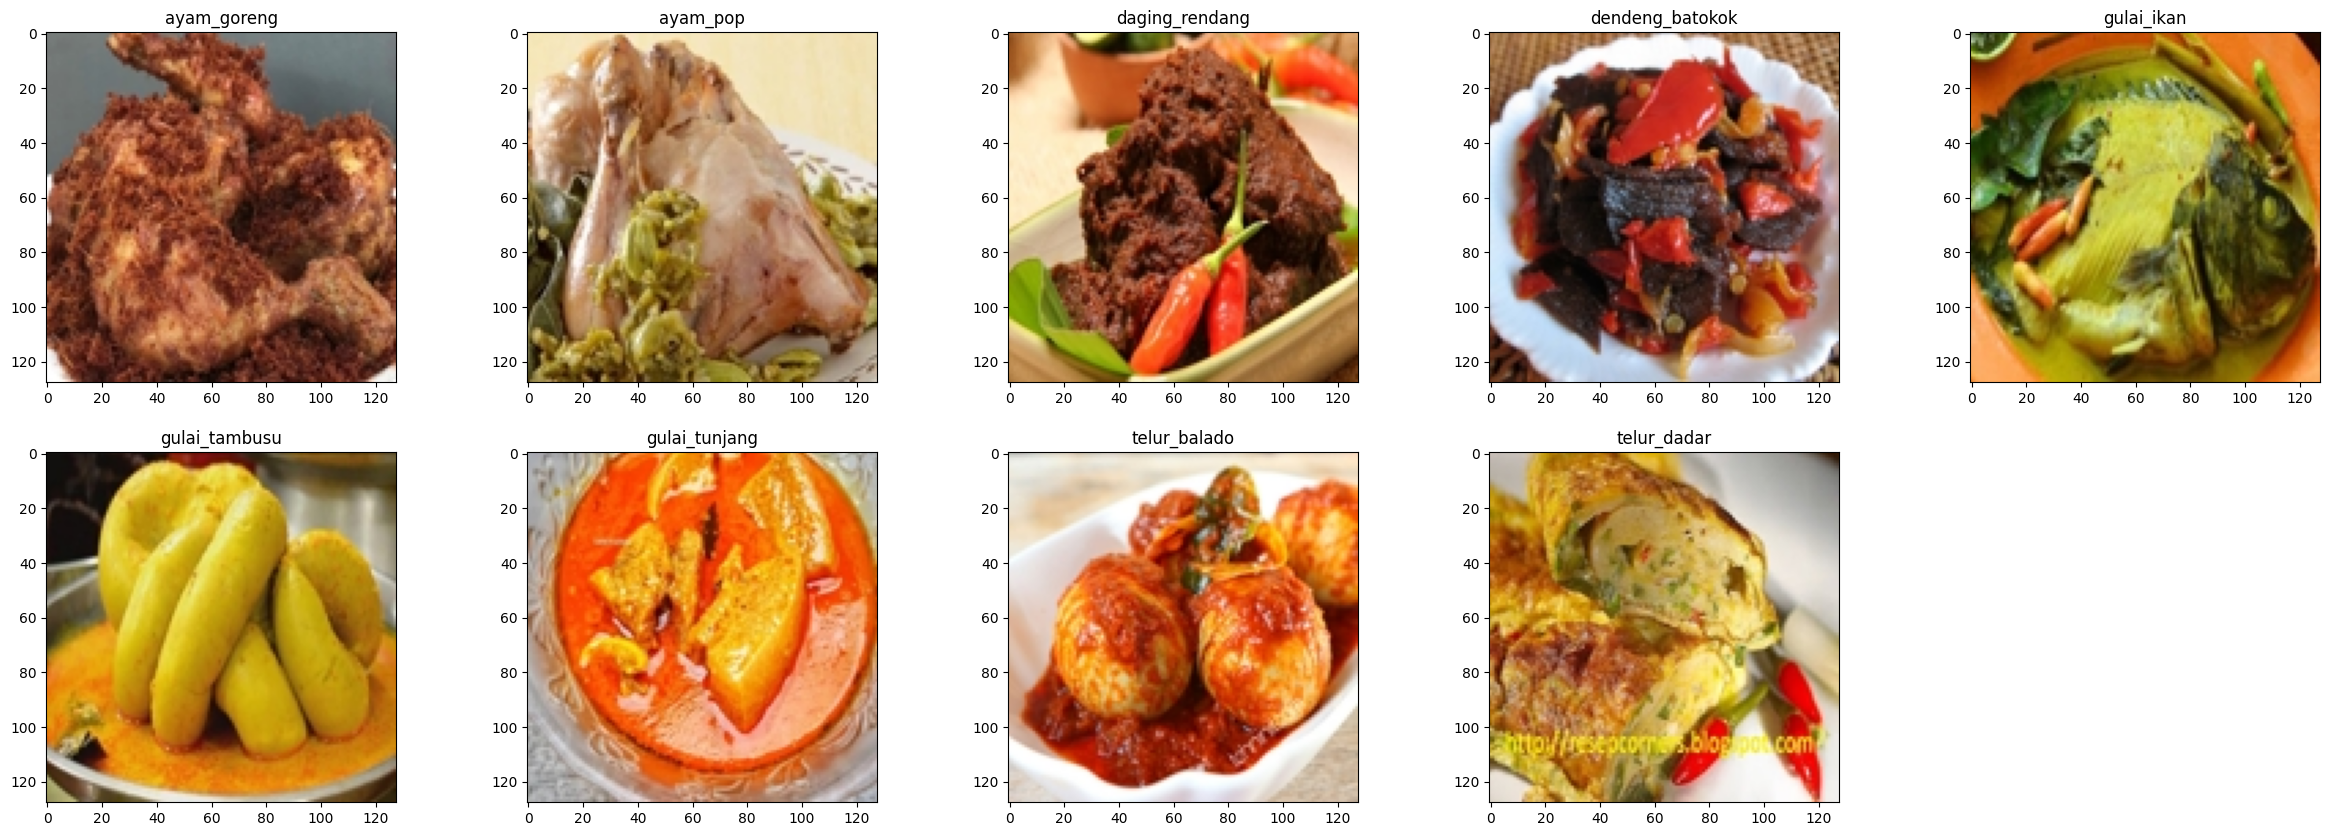

In [7]:
#show image
fig = plt.figure(figsize = (30,10))

image_position = 0

for index, folder in enumerate(folders.keys()):
    for j in range(1):
        image_position += 1
        # Adds a subplot at the 1st position
        fig.add_subplot(2, 5, image_position)
        plt.imshow(img.imread(os.path.join(use_path, folder, folders[folder][random.randint(0,100)])))
        plt.title(folder)
        

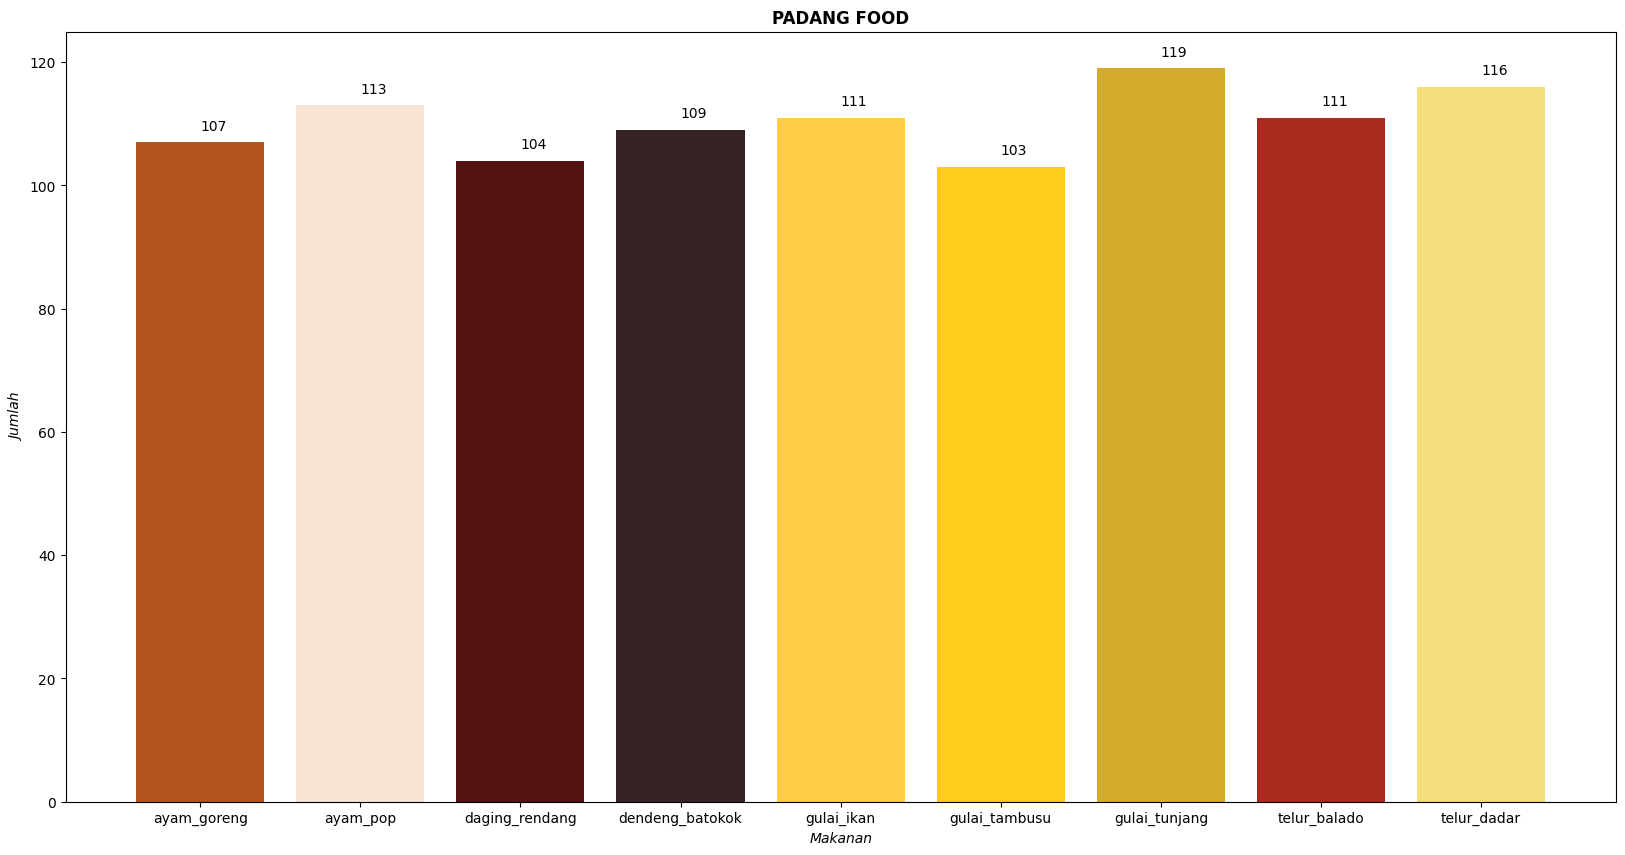

In [8]:
# visualization
plt.figure(figsize = (20,10))
plt.title('PADANG FOOD', fontweight='bold')
plt.xlabel('Makanan', fontstyle='oblique')
plt.ylabel('Jumlah', fontstyle='oblique')
plt.bar(folders.keys(),
        [len(data) for data in folders.values()],
        color=['#B3541E', '#F9E4D4', '#541212', '#362222', '#FFCE45','#FFCC1D','#D4AC2B','#AA2B1D','#F5DD7B'])

for index, value in enumerate([len(data) for data in folders.values()]):
    plt.text(index, value + 2,str(value))

plt.show()

In [9]:
#Analisis
print('-'*32)
for index, value in folders.items():
    print(f'Jumlah {index}',f'\t: {len(value)}',('||'))
    print('-'*32)

--------------------------------
Jumlah ayam_goreng 	: 107 ||
--------------------------------
Jumlah ayam_pop 	: 113 ||
--------------------------------
Jumlah daging_rendang 	: 104 ||
--------------------------------
Jumlah dendeng_batokok 	: 109 ||
--------------------------------
Jumlah gulai_ikan 	: 111 ||
--------------------------------
Jumlah gulai_tambusu 	: 103 ||
--------------------------------
Jumlah gulai_tunjang 	: 119 ||
--------------------------------
Jumlah telur_balado 	: 111 ||
--------------------------------
Jumlah telur_dadar 	: 116 ||
--------------------------------


In [10]:
if (os.path.isdir(os.path.join(destination, 'training'))):
    print(f"path {os.path.join(destination, 'training')} sudah ada")
else:
    os.makedirs(os.path.join(destination, 'training'))
    for folder in folders.keys():
        os.makedirs(os.path.join(destination, f'training/{folder}'))

if (os.path.isdir(os.path.join(destination, 'validation'))):
    print(f"path {os.path.join(destination, 'validation')} sudah ada")
else:
    os.makedirs(os.path.join(destination, 'validation'))
    for folder in folders.keys():
        os.makedirs(os.path.join(destination, f'validation/{folder}'))
        
if (os.path.isdir(os.path.join(destination, 'testing'))):
    print(f"path {os.path.join(destination, 'testing')} sudah ada")
else:
    os.makedirs(os.path.join(destination, 'testing'))
    for folder in folders.keys():
        os.makedirs(os.path.join(destination, f'testing/{folder}'))

path D:\folder kiki\kuliah semester 5\praktikum KB\pa\data_tvt\training sudah ada
path D:\folder kiki\kuliah semester 5\praktikum KB\pa\data_tvt\validation sudah ada
path D:\folder kiki\kuliah semester 5\praktikum KB\pa\data_tvt\testing sudah ada


In [11]:
files = {
    "ayam_goreng" : [],
    "ayam_pop" : [],
    "daging_rendang" : [],
    "dendeng_batokok" : [],
    "gulai_ikan" : [],
    "gulai_tambusu" : [],
    "gulai_tunjang" : [],
    "telur_balado" : [],
    "telur_dadar" : [],
}

for folder in files.keys():
    for file in os.listdir(os.path.join(use_path, folder)):
        if (os.path.getsize(os.path.join(use_path, f"{folder}/{file}"))):
            files[folder].append(file)
        else:
            print(f'file {file} dilewati saja')
            

In [12]:
for folder in files.keys():
    files[folder] = random.sample(files[folder], len(files[folder]))
    
file_training = {
    "ayam_goreng" : [],
    "ayam_pop" : [],
    "daging_rendang" : [],
    "dendeng_batokok" : [],
    "gulai_ikan" : [],
    "gulai_tambusu" : [],
    "gulai_tunjang" : [],
    "telur_balado" : [],
    "telur_dadar" : [],
}

file_validation = {
    "ayam_goreng" : [],
    "ayam_pop" : [],
    "daging_rendang" : [],
    "dendeng_batokok" : [],
    "gulai_ikan" : [],
    "gulai_tambusu" : [],
    "gulai_tunjang" : [],
    "telur_balado" : [],
    "telur_dadar" : [],
}

file_testing = {
    "ayam_goreng" : [],
    "ayam_pop" : [],
    "daging_rendang" : [],
    "dendeng_batokok" : [],
    "gulai_ikan" : [],
    "gulai_tambusu" : [],
    "gulai_tunjang" : [],
    "telur_balado" : [],
    "telur_dadar" : [],
}

In [13]:
for folder in file_training.keys():
    file_training[folder] = files[folder][:-20]
    
for folder in file_validation.keys():
    file_validation[folder] = files[folder][-20:-10]
    
for folder in file_testing.keys():
    file_testing[folder] = files[folder][-10:]
    
len(file_training['ayam_goreng'])

87

In [14]:
for folder in file_training.keys():
    for file in file_training[folder]:
        shutil.copyfile(
            os.path.join(use_path, f'{folder}/{file}'),
            os.path.join(destination, f'training/{folder}/{file}')
        )
    for file in file_validation[folder]:
        shutil.copyfile(
            os.path.join(use_path, f'{folder}/{file}'),
            os.path.join(destination, f'validation/{folder}/{file}')
        )
    for file in file_testing[folder]:
        shutil.copyfile(
            os.path.join(use_path, f'{folder}/{file}'),
            os.path.join(destination, f'testing/{folder}/{file}')
        )